In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

## KC data processing

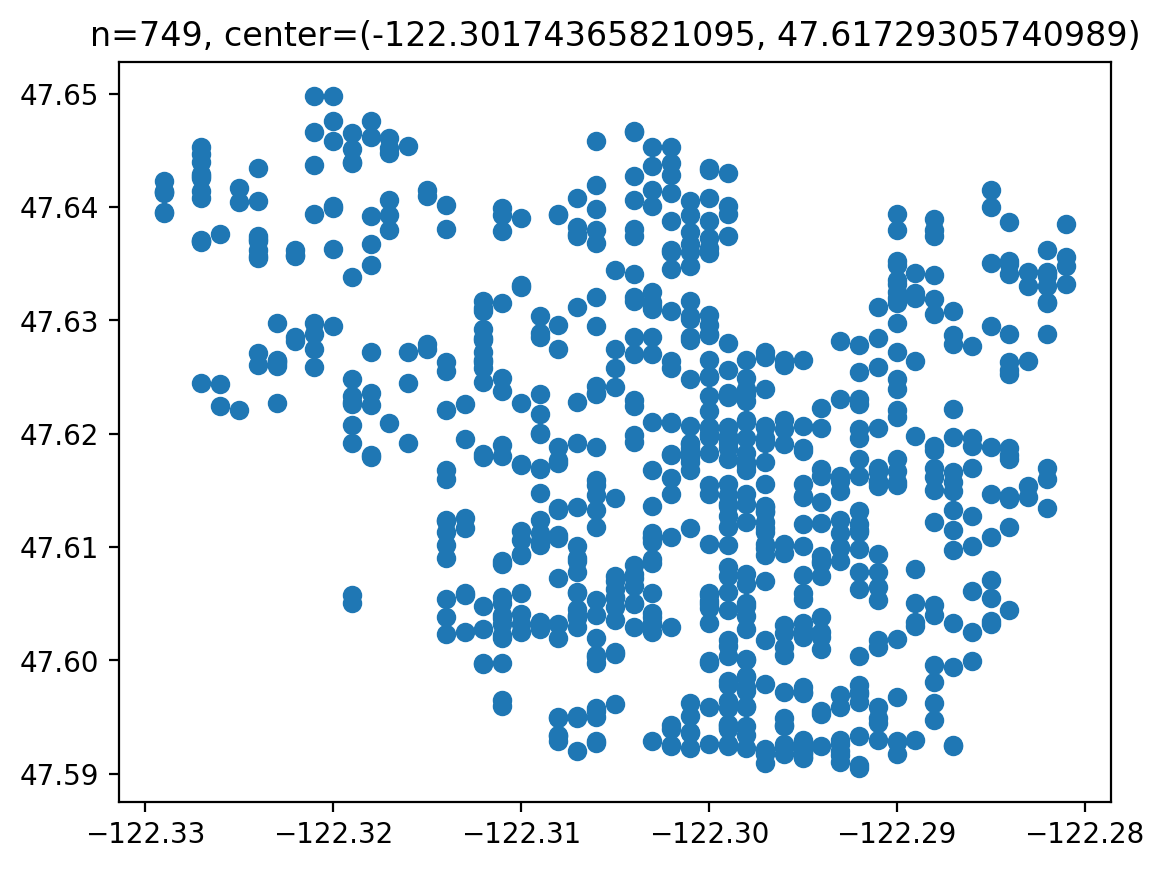

In [234]:
# 1. load data and drop duplicate locations
df=pd.read_csv('kc_house_data.csv')
df.drop_duplicates(subset=['lat','long'],inplace=True)

# 2. restrict data
def inBounds(lat,long):
    return lat<47.65 and lat>47.59 and long>-122.33 and long<-122.28 and (lat > -0.925*long - 65.547)
df=df[df.apply(lambda x: inBounds(x['lat'],x['long']),axis=1)]
fig,ax=plt.subplots()
ax.set_title(f'n={len(df)}')
ax.scatter(df['long'],df['lat'])

# 3. save data
df.to_csv('kc_house_sample.csv')
print(f"center={df['long'].mean(),df['lat'].mean()}")

In [237]:
# 4. load predictions (after AGWR)
pred=pd.read_csv('kc_predictions.csv')
df['predicted']=pred['predicted'].values

# 5. print data in JSON
def toJSON(df,limit=500):
    i=1
    for index,row in df.iterrows():
        print('{latitude:',row['lat'],
              ', longitude:',row['long'],
              ',actual:',row['price'],
              ',predicted:',int(row['predicted']),
              '},')
        if (limit and i==limit): break
        i+=1

toJSON(df)

{latitude: 47.6221 , longitude: -122.314 ,actual: 667000.0 ,predicted: 642212 },
{latitude: 47.6113 , longitude: -122.297 ,actual: 425000.0 ,predicted: 464481 },
{latitude: 47.6415 , longitude: -122.315 ,actual: 850830.0 ,predicted: 981614 },
{latitude: 47.6106 , longitude: -122.31 ,actual: 425000.0 ,predicted: 408331 },
{latitude: 47.6101 , longitude: -122.307 ,actual: 385000.0 ,predicted: 431876 },
{latitude: 47.6136 , longitude: -122.303 ,actual: 410000.0 ,predicted: 470723 },
{latitude: 47.6362 , longitude: -122.302 ,actual: 780000.0 ,predicted: 767994 },
{latitude: 47.5964 , longitude: -122.299 ,actual: 425000.0 ,predicted: 391975 },
{latitude: 47.6166 , longitude: -122.287 ,actual: 2050000.0 ,predicted: 2018849 },
{latitude: 47.6239 , longitude: -122.298 ,actual: 725000.0 ,predicted: 687697 },
{latitude: 47.601 , longitude: -122.294 ,actual: 834000.0 ,predicted: 728906 },
{latitude: 47.644 , longitude: -122.319 ,actual: 740000.0 ,predicted: 755293 },
{latitude: 47.592 , longitude

## NY data processing

center=(-73.88455175068744, 40.84830495875344)


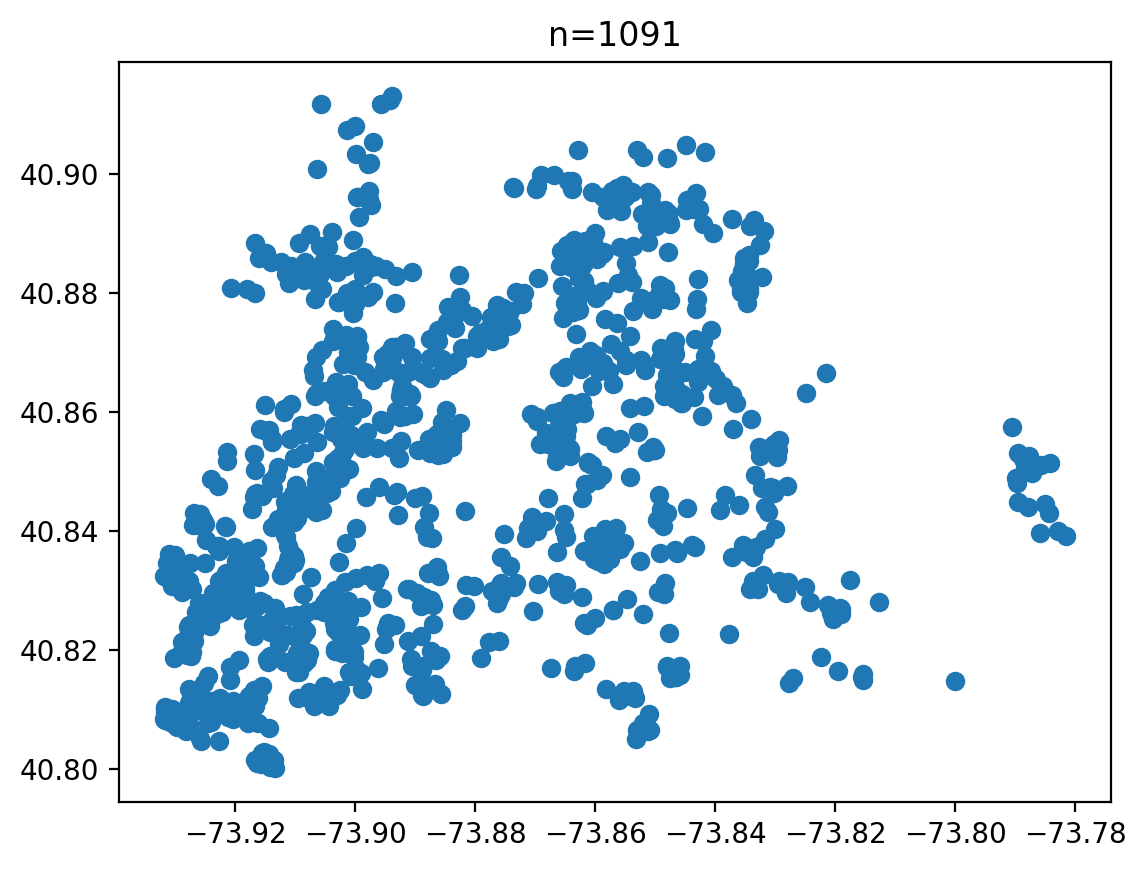

In [277]:
# 1. load data and drop duplicate locations
df=pd.read_csv('AB_NYC_2019.csv')
df.drop_duplicates(subset=['latitude','longitude'],inplace=True)

# 2. restrict data
df=df[df.apply(lambda x: x['neighbourhood_group']=='Bronx',axis=1)]
fig,ax=plt.subplots()
ax.set_title(f'n={len(df)}')
ax.scatter(df['longitude'],df['latitude'])

# 3. replace NaN with 0 in reviews_per_month
df['reviews_per_month'].fillna(0,inplace=True)

# 3. save data
df.to_csv('ny_airbnb_sample.csv')
print(f"center={df['longitude'].mean(),df['latitude'].mean()}")

In [280]:
# 4. load predictions (after AGWR)
pred=pd.read_csv('kc_predictions.csv')
df['predicted']=pred['predicted'].values

# 5. print data in JSON
def toJSON(df,limit=500):
    i=1
    for index,row in df.iterrows():
        print('{latitude:',row['latitude'],
              ', longitude:',row['longitude'],
              ',actual:',row['price'],
              ',predicted:',int(row['predicted']),
              '},')
        if (limit and i==limit): break
        i+=1

toJSON(df)

{latitude: 40.83232 , longitude: -73.93184 ,actual: 40 ,predicted: 156 },
{latitude: 40.83075 , longitude: -73.93058 ,actual: 45 ,predicted: 158 },
{latitude: 40.81309 , longitude: -73.85514 ,actual: 90 ,predicted: 116 },
{latitude: 40.88057 , longitude: -73.83572 ,actual: 105 ,predicted: 134 },
{latitude: 40.87207 , longitude: -73.90193 ,actual: 90 ,predicted: 113 },
{latitude: 40.89747 , longitude: -73.8639 ,actual: 77 ,predicted: 28 },
{latitude: 40.85811 , longitude: -73.90675 ,actual: 37 ,predicted: 79 },
{latitude: 40.86466 , longitude: -73.85709 ,actual: 125 ,predicted: 50 },
{latitude: 40.82802 , longitude: -73.92039 ,actual: 50 ,predicted: 19 },
{latitude: 40.83001 , longitude: -73.92158 ,actual: 50 ,predicted: 34 },
{latitude: 40.8679 , longitude: -73.90023 ,actual: 42 ,predicted: 64 },
{latitude: 40.89557 , longitude: -73.8447 ,actual: 50 ,predicted: 238 },
{latitude: 40.87991 , longitude: -73.91673 ,actual: 120 ,predicted: 177 },
{latitude: 40.81128 , longitude: -73.92399 ,

## MISC

In [61]:
def gaussian(zs):
	return np.exp(-0.5 * (zs)**2)